# **Planejamento de Métodos**

**Outliers:** Aplicar a transformação logarítmica `log1p` (logaritmo de 1 + x) nas variáveis distorcidas (CRIM, ZN, B) e, em seguida, normalizar os dados com o `Standard Scaler`.

**Valores faltantes (NaN):** Utilizar o `KNN` (K-Nearest Neighbors Imputer), aplicado **após a normalização!!!**.

**Modelo escolhido:** Utilizar `RNA` e `Random Forest`, por serem modelos robustos e eficientes com variáveis correlacionadas.

**MEDV** será utilizado como varaivel alvo para a regressão


In [24]:
import kagglehub
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import StandardScaler
import sys
print(sys.executable)

c:\Users\marco\AppData\Local\Programs\Python\Python312\python.exe


In [25]:
# Download latest version
path = kagglehub.dataset_download("altavish/boston-housing-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\marco\.cache\kagglehub\datasets\altavish\boston-housing-dataset\versions\1


# Análise Exploratória de Dados

In [26]:

print("Arquivos no diretório baixado:", os.listdir(path))

csv_path = os.path.join(path, "HousingData.csv")

df = pd.read_csv(csv_path)

# Mostrar as primeiras linhas do dataset
print("Primeiras 5 linhas do dataset:")
display(df.head())




Arquivos no diretório baixado: ['HousingData.csv']
Primeiras 5 linhas do dataset:


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


Aqui está uma tabela descritiva de cada abreviação das colunas:

<small>

**CRIM** - taxa de criminalidade per capita por cidade<br>
**ZN** - proporção de terrenos residenciais zoneados para lotes com mais de 2.300 m²<br>
**INDUS** - proporção de hectares não comerciais por cidade<br>
**CHAS** - variável fictícia do Rio Charles (1 se o trato limita o rio; 0 caso contrário)<br>
**NOX** - concentração de óxidos nítricos (partes por 10 milhões)<br>
**RM** - número médio de cômodos por moradia<br>
**AGE** - proporção de unidades ocupadas pelos proprietários construídas antes de 1940<br>
**DIS** - distâncias ponderadas para cinco centros de emprego de Boston<br>
**RAD** - índice de acessibilidade a rodovias radiais<br>
**TAX** - taxa de imposto sobre a propriedade do valor integral por US$ 10.000<br>
**PTRATIO** - proporção aluno-professor por cidade<br>
**B** - 1000(Bk - 0,63)^2 onde Bk é a proporção de negros por cidade<br>
**LSTAT** - % de status inferior da população<br>
**MEDV** - valor médio de casas ocupadas pelos proprietários em milhares de dólares

</small>



In [27]:
# Mostrar informações sobre o dataset
print("\nInformações do dataset:")
display(df.info())




Informações do dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


None

In [28]:
# Verificar dados nulos
print("\nNúmero de valores nulos por coluna:")
print(df.isnull().sum())


Número de valores nulos por coluna:
CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64


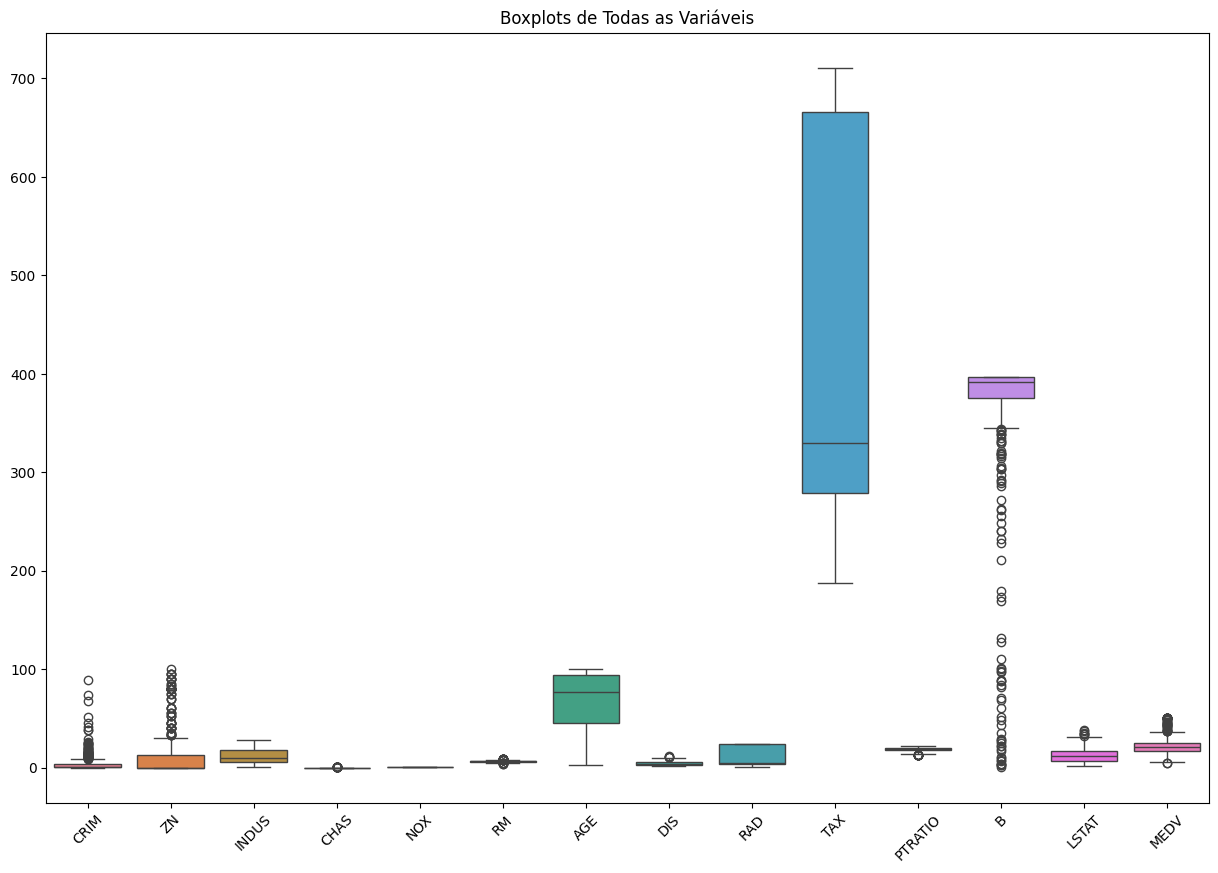


Detecção de Outliers:
--------------------------------------------------

CRIM:
Número de outliers: 65
Limites: [-5.14, 8.78]
Valores dos outliers: [ 8.98296 13.5222   9.2323  11.1081  18.4982  19.6091  15.288    9.82349
 23.6482  17.8667  88.9762  15.8744   9.18702 20.0849  16.8118  24.3938
 22.5971  14.3337  11.5779  38.3518   9.91655 25.0461  14.2362   9.59571
 24.8017  41.5292  67.9208  20.7162  11.9511  51.1358  14.0507  18.811
 28.6558  45.7461  18.0846  10.8342  25.9406  73.5341  11.8123  11.0874
 12.0482   8.79212 15.8603  37.6619   9.33889 10.0623  13.9134  11.1604
 14.4208  15.1772  13.6781   9.39063 22.0511   9.72418  9.96654 12.8023
 10.6718   9.92485  9.32909  9.51363 15.5757  13.0751  15.0234  10.233
 14.3337 ]

ZN:
Número de outliers: 63
Limites: [-18.75, 31.25]
Valores dos outliers: [ 75.   75.   75.   90.   85.  100.   80.   80.   45.   45.   45.   45.
  45.   45.   60.   60.   80.   80.   80.   80.   95.   95.   82.5  82.5
  95.   95.   80.   80.   90.   40.   40.   

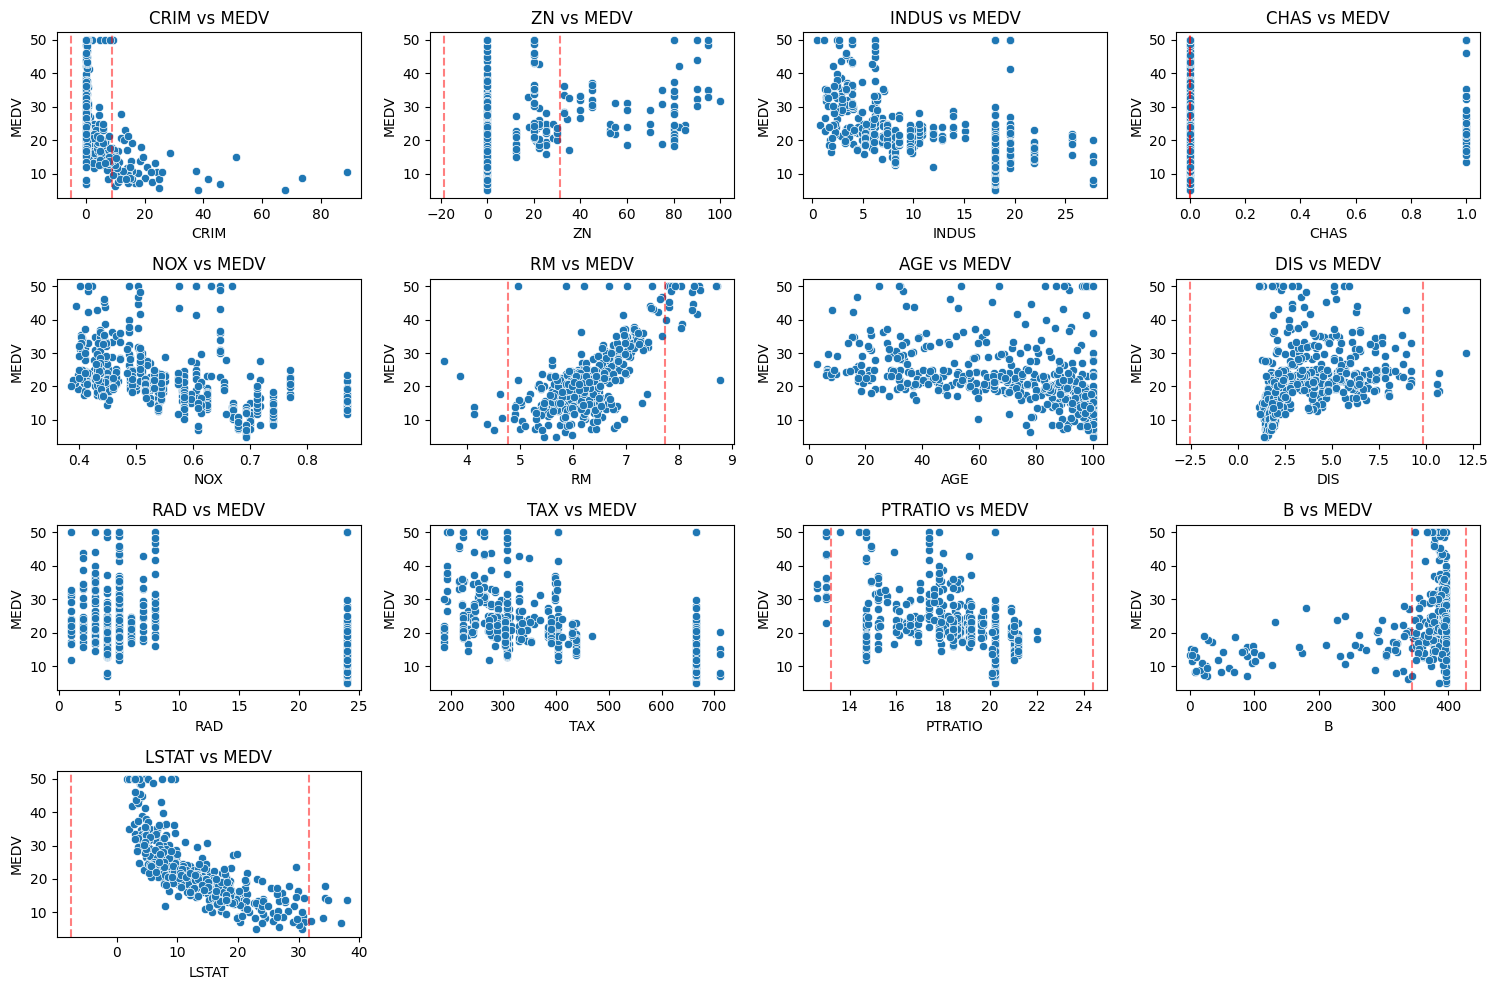

In [29]:
# Função para detectar outliers
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
    return outliers, lower_bound, upper_bound

# Criar boxplots
plt.figure(figsize=(15, 10))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.title('Boxplots de Todas as Variáveis')
plt.show()

# Detectar e mostrar outliers
print("\nDetecção de Outliers:")
print("-" * 50)

for column in df.columns:
    outliers, lower_bound, upper_bound = detect_outliers(df, column)
    if len(outliers) > 0:
        print(f"\n{column}:")
        print(f"Número de outliers: {len(outliers)}")
        print(f"Limites: [{lower_bound:.2f}, {upper_bound:.2f}]")
        print(f"Valores dos outliers: {outliers.values}")

# Visualizar outliers em relação à variável alvo (MEDV)
plt.figure(figsize=(15, 10))
for i, column in enumerate(df.columns[:-1], 1):
    plt.subplot(4, 4, i)
    sns.scatterplot(data=df, x=column, y='MEDV')
    outliers, lower_bound, upper_bound = detect_outliers(df, column)
    if len(outliers) > 0:
        plt.axvline(x=lower_bound, color='r', linestyle='--', alpha=0.5)
        plt.axvline(x=upper_bound, color='r', linestyle='--', alpha=0.5)
    plt.title(f'{column} vs MEDV')

plt.tight_layout()
plt.show()

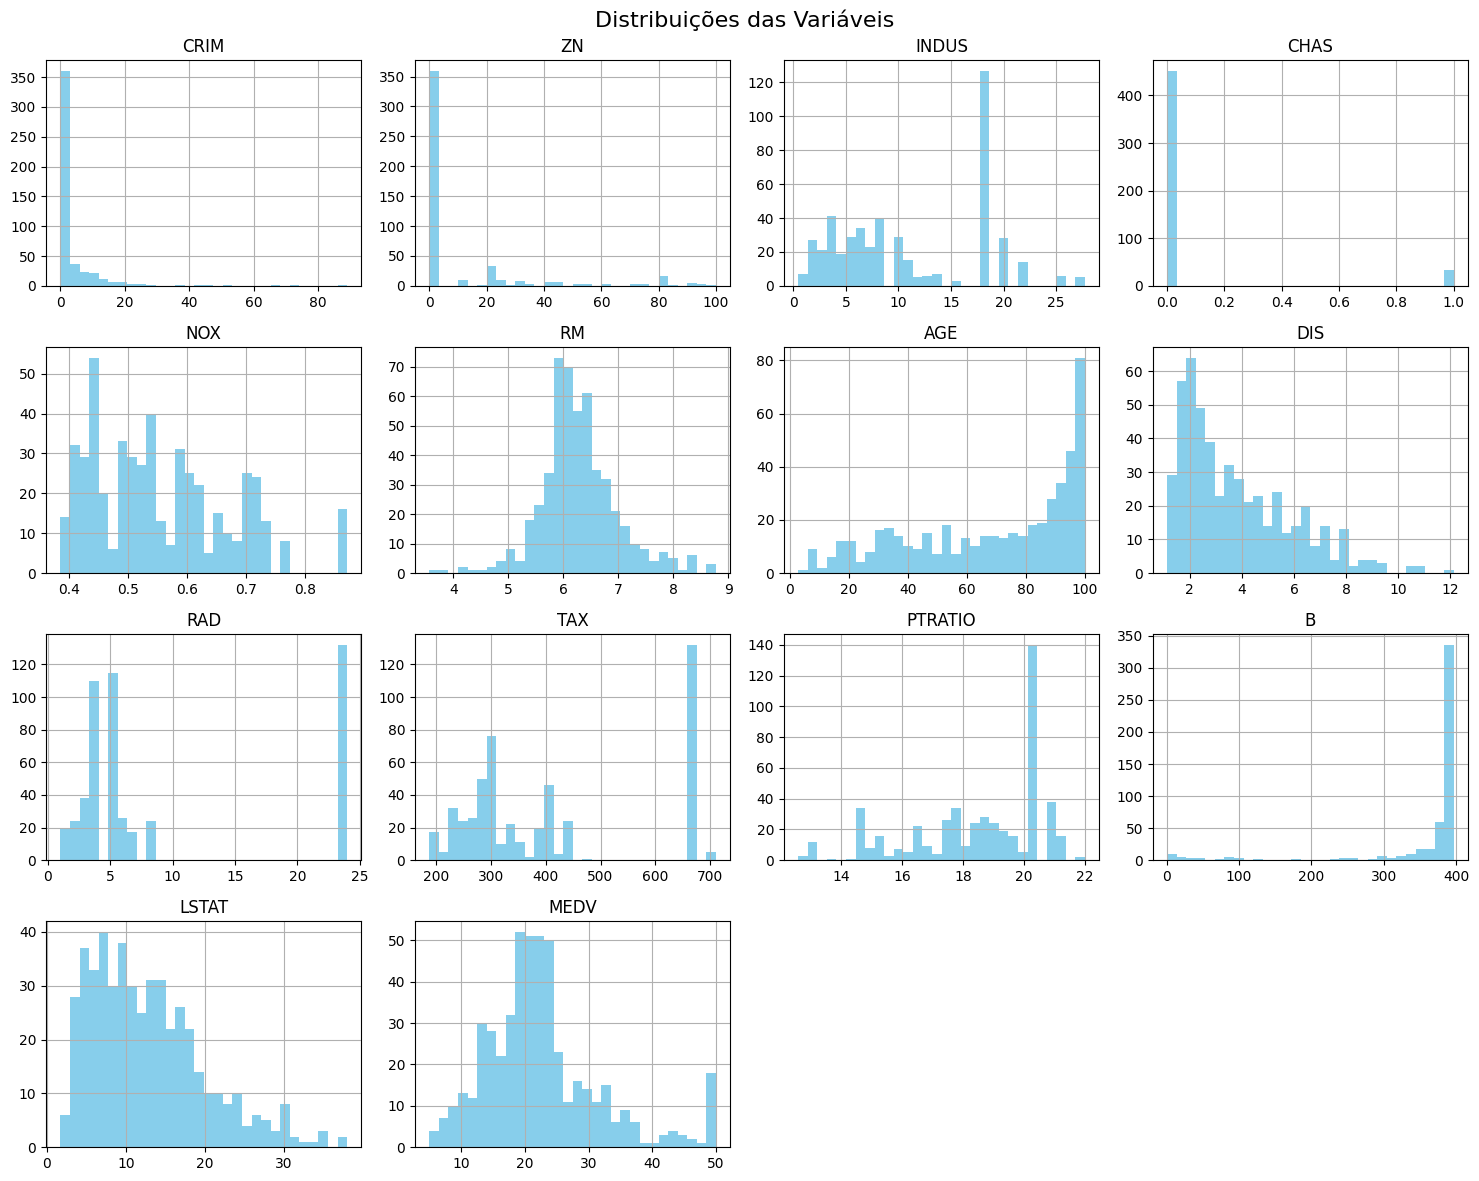

In [30]:
df.hist(bins=30, figsize=(15, 12), color='skyblue')
plt.suptitle("Distribuições das Variáveis", fontsize=16)
plt.tight_layout()
plt.show()

# eixo x = faixas de valores
# eixo y = número de registros (quantas vezes esses valores aparecem)

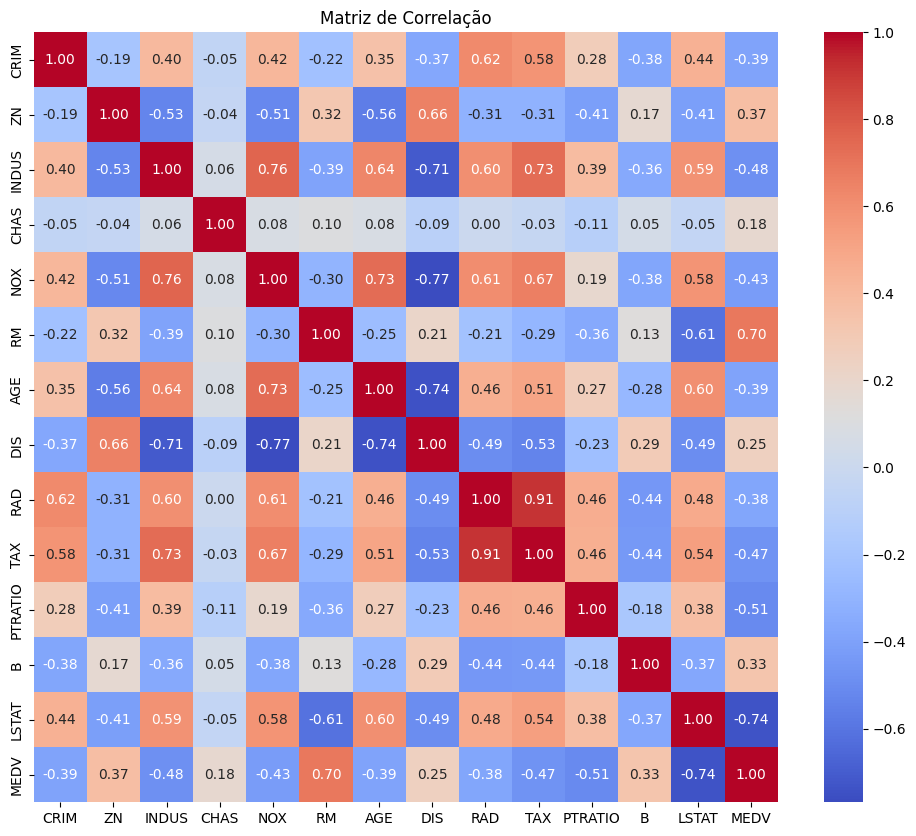

In [31]:
# 5. Matriz de correlação
correlation = df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlação")
plt.show()

#  Limpeza e preparação dos dados

### Correção de outiliers com log1p

O Chas nao deve entrar ja que e um dado binario ( portanto sua demonstracao no bloxpot ocorre um falso positivo)

=== CORREÇÃO DE OUTLIERS USANDO TRANSFORMAÇÃO LOGARÍTMICA ===

Antes da correção:
--------------------------------------------------
CRIM: 65 outliers | Assimetria: 5.213
ZN: 63 outliers | Assimetria: 2.257
B: 77 outliers | Assimetria: -2.890


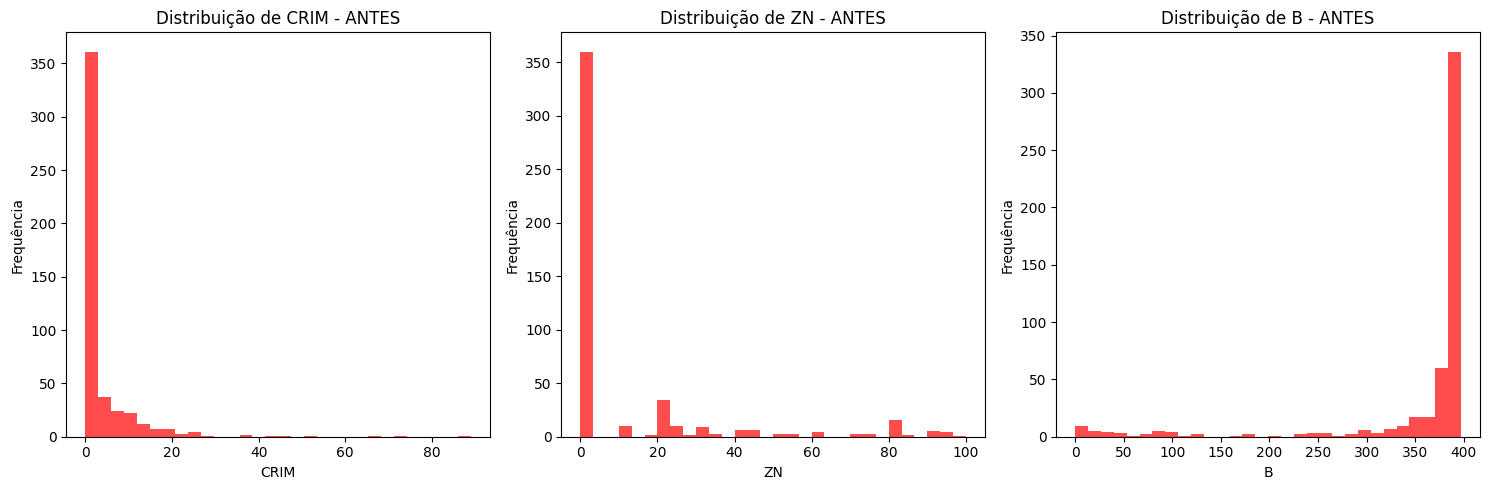


APLICANDO TRANSFORMAÇÃO LOGARÍTMICA np.log1p()...
✓ Transformação log1p aplicada em CRIM
✓ Transformação log1p aplicada em ZN
✓ Transformação log1p aplicada em B

Após a correção:
--------------------------------------------------
CRIM: 6 outliers | Assimetria: 1.301
ZN: 0 outliers | Assimetria: 1.231
B: 78 outliers | Assimetria: -4.459


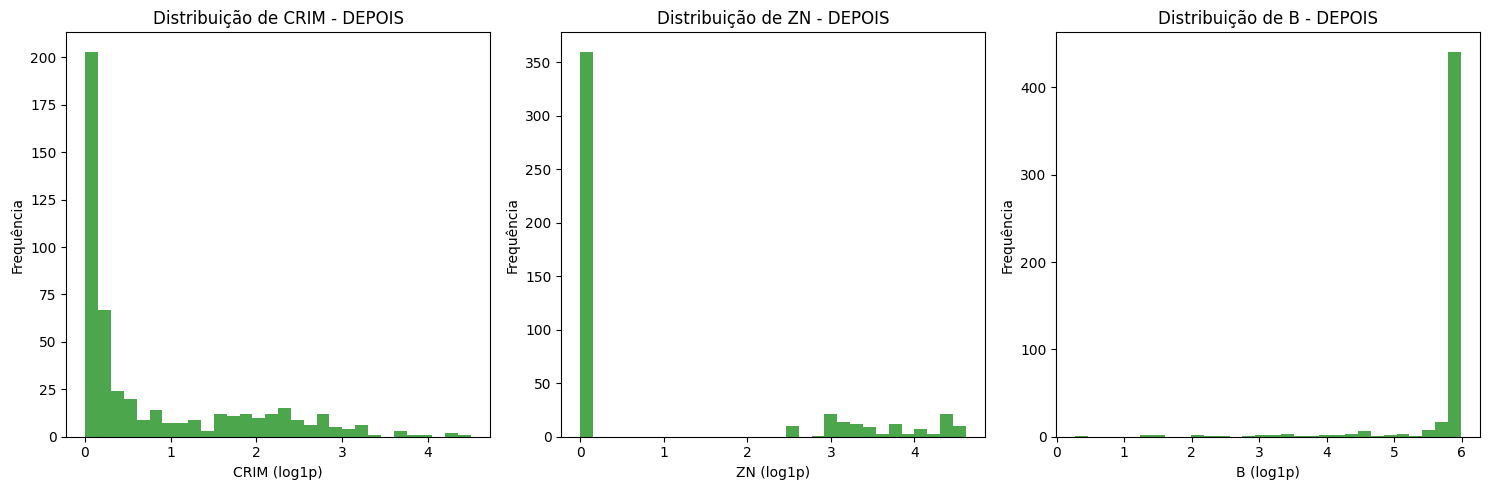


COMPARAÇÃO ANTES vs DEPOIS


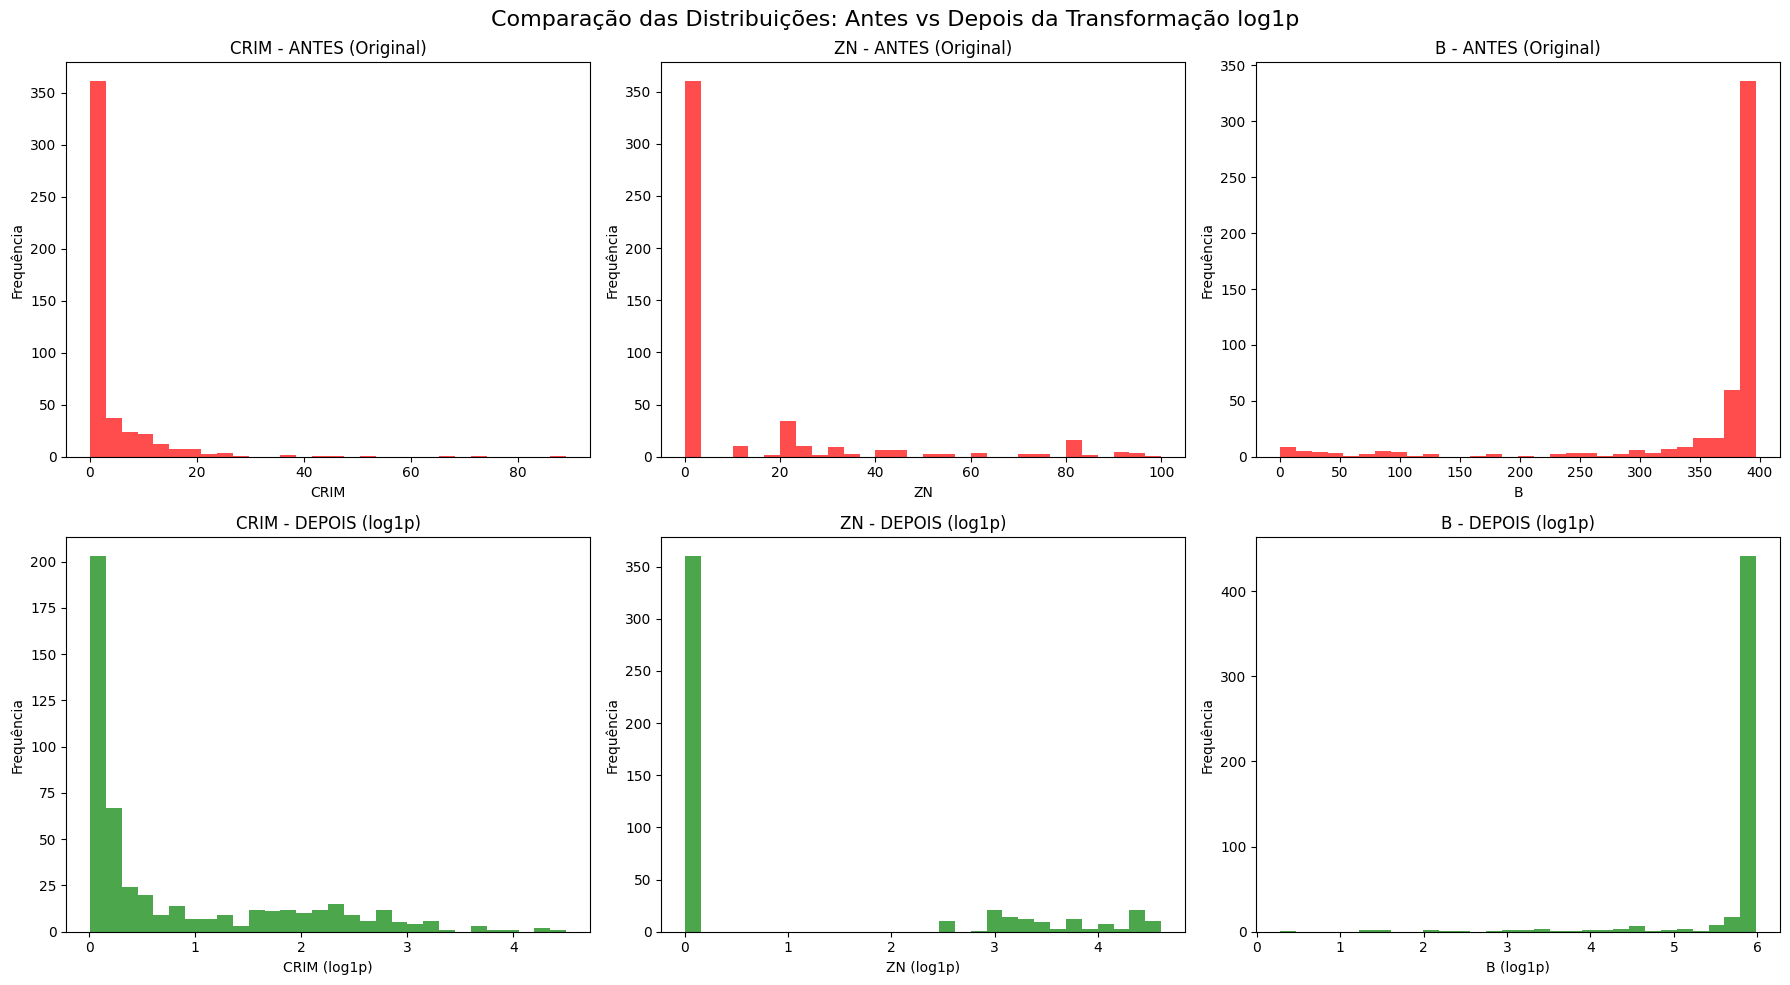


Resumo Estatístico da Correção:

CRIM:
  Outliers: 65 → 6
  Assimetria: 5.213 → 1.301
  Redução da assimetria: 3.912

ZN:
  Outliers: 63 → 0
  Assimetria: 2.257 → 1.231
  Redução da assimetria: 1.026

B:
  Outliers: 77 → 78
  Assimetria: -2.890 → -4.459
  Redução da assimetria: -1.569

✅ Transformação log1p concluída com sucesso!
Próximo passo: Normalização com StandardScaler


In [32]:
import numpy as np
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

# Salvar cópia original apenas para comparação visual e estatística
df_original = df.copy()

### **Correção de Outliers usando np.log1p()**

# Variáveis que apresentam outliers e distribuição assimétrica
variaveis_outliers = ['CRIM', 'ZN', 'B']

print("=== CORREÇÃO DE OUTLIERS USANDO TRANSFORMAÇÃO LOGARÍTMICA ===")
print("\nAntes da correção:")
print("-" * 50)

# Mostrar estatísticas antes da correção
for var in variaveis_outliers:
    outliers, lower_bound, upper_bound = detect_outliers(df, var)
    print(f"{var}: {len(outliers)} outliers | Assimetria: {df[var].skew():.3f}")

# Visualizar distribuições antes da correção
plt.figure(figsize=(15, 5))
for i, var in enumerate(variaveis_outliers, 1):
    plt.subplot(1, 3, i)
    plt.hist(df[var].dropna(), bins=30, alpha=0.7, color='red')
    plt.title(f'Distribuição de {var} - ANTES')
    plt.xlabel(var)
    plt.ylabel('Frequência')

plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("APLICANDO TRANSFORMAÇÃO LOGARÍTMICA np.log1p()...")
print("="*60)

# Aplicar transformação logarítmica np.log1p() nas variáveis com outliers
for var in variaveis_outliers:
    min_val = df[var].min()
    if min_val < 0:
        print(f"Atenção: {var} tem valores negativos. Valor mínimo: {min_val:.3f}")
        df[var] = df[var] - min_val + 1
        print(f"Valores ajustados para {var} (adicionado {-min_val + 1:.3f})")
    
    df[var] = np.log1p(df[var])
    print(f"✓ Transformação log1p aplicada em {var}")

print("\nApós a correção:")
print("-" * 50)

# Mostrar estatísticas após a correção
for var in variaveis_outliers:
    outliers, lower_bound, upper_bound = detect_outliers(df, var)
    print(f"{var}: {len(outliers)} outliers | Assimetria: {df[var].skew():.3f}")

# Visualizar distribuições após a correção
plt.figure(figsize=(15, 5))
for i, var in enumerate(variaveis_outliers, 1):
    plt.subplot(1, 3, i)
    plt.hist(df[var].dropna(), bins=30, alpha=0.7, color='green')
    plt.title(f'Distribuição de {var} - DEPOIS')
    plt.xlabel(f'{var} (log1p)')
    plt.ylabel('Frequência')

plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("COMPARAÇÃO ANTES vs DEPOIS")
print("="*60)

# Comparação lado a lado
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Comparação das Distribuições: Antes vs Depois da Transformação log1p', fontsize=16)

for i, var in enumerate(variaveis_outliers):
    # Antes (linha superior)
    axes[0, i].hist(df_original[var].dropna(), bins=30, alpha=0.7, color='red', label='Original')
    axes[0, i].set_title(f'{var} - ANTES (Original)')
    axes[0, i].set_xlabel(var)
    axes[0, i].set_ylabel('Frequência')
    
    # Depois (linha inferior)
    axes[1, i].hist(df[var].dropna(), bins=30, alpha=0.7, color='green', label='log1p')
    axes[1, i].set_title(f'{var} - DEPOIS (log1p)')
    axes[1, i].set_xlabel(f'{var} (log1p)')
    axes[1, i].set_ylabel('Frequência')

plt.tight_layout()
plt.show()

# Mostrar resumo estatístico
print("\nResumo Estatístico da Correção:")
print("="*60)
for var in variaveis_outliers:
    print(f"\n{var}:")
    print(f"  Outliers: {len(detect_outliers(df_original, var)[0])} → {len(detect_outliers(df, var)[0])}")
    print(f"  Assimetria: {df_original[var].skew():.3f} → {df[var].skew():.3f}")
    print(f"  Redução da assimetria: {abs(df_original[var].skew()) - abs(df[var].skew()):.3f}")

print(f"\n✅ Transformação log1p concluída com sucesso!")
print(f"Próximo passo: Normalização com StandardScaler")


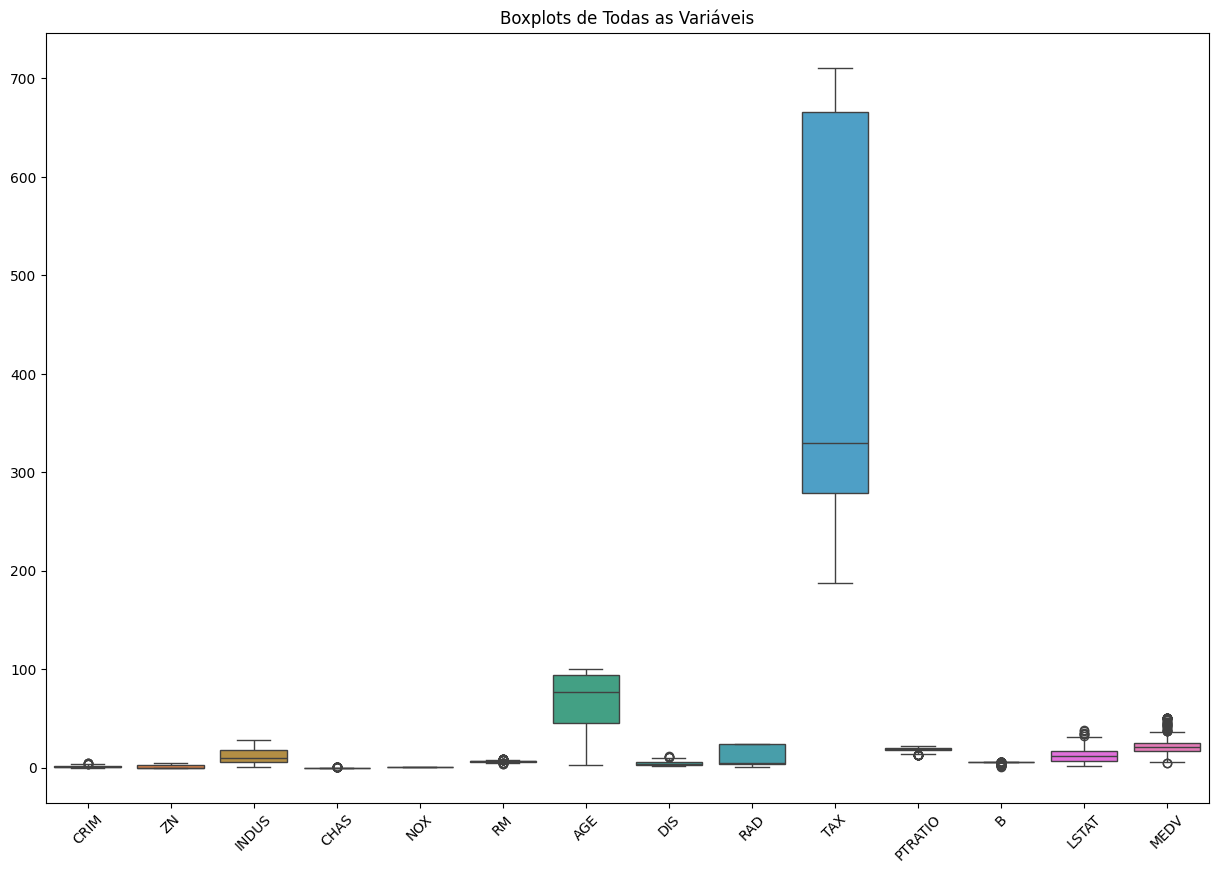

In [33]:
# Função para detectar outliers
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
    return outliers, lower_bound, upper_bound

# Criar boxplots
plt.figure(figsize=(15, 10))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.title('Boxplots de Todas as Variáveis')
plt.show()


In [34]:
# from sklearn.preprocessing import StandardScaler

# # Variáveis que você quer normalizar (pode ser as mesmas usadas na correção ou outras)
# variaveis_para_normalizar = ['CRIM', 'ZN', 'B']

# # Criar o scaler
# scaler = StandardScaler()

# # Aplicar o scaler nas variáveis selecionadas
# df[variaveis_para_normalizar] = scaler.fit_transform(df[variaveis_para_normalizar])

# # Mostrar as 5 primeiras linhas para conferir
# print(df[variaveis_para_normalizar].head())

# Colunas que não serão normalizadas
colunas_excluidas = ['CHAS', 'MEDV']

# Selecionar as colunas numéricas para normalizar
colunas_para_normalizar = [col for col in df.columns if col not in colunas_excluidas]

# Aplicar StandardScaler
scaler = StandardScaler()
df[colunas_para_normalizar] = scaler.fit_transform(df[colunas_para_normalizar])

print(df.head())



       CRIM        ZN     INDUS  CHAS       NOX        RM       AGE       DIS  \
0 -0.784490  1.248824 -1.284840   0.0 -0.144217  0.413672 -0.118643  0.140214   
1 -0.764258 -0.580336 -0.587798   0.0 -0.740262  0.194274  0.371156  0.557160   
2 -0.764277 -0.580336 -0.587798   0.0 -0.740262  1.282714 -0.265225  0.557160   
3 -0.759442 -0.580336 -1.303877   0.0 -0.835284  1.016303 -0.812226  1.077737   
4 -0.725225 -0.580336 -1.303877   0.0 -0.835284  1.228577 -0.511911  1.077737   

        RAD       TAX   PTRATIO         B     LSTAT  MEDV  
0 -0.982843 -0.666608 -1.459000  0.311086 -1.082105  24.0  
1 -0.867883 -0.987329 -0.303094  0.311086 -0.500165  21.6  
2 -0.867883 -0.987329 -0.303094  0.296977 -1.215000  34.7  
3 -0.752922 -1.106115  0.113032  0.303235 -1.367479  33.4  
4 -0.752922 -1.106115  0.113032  0.311086       NaN  36.2  


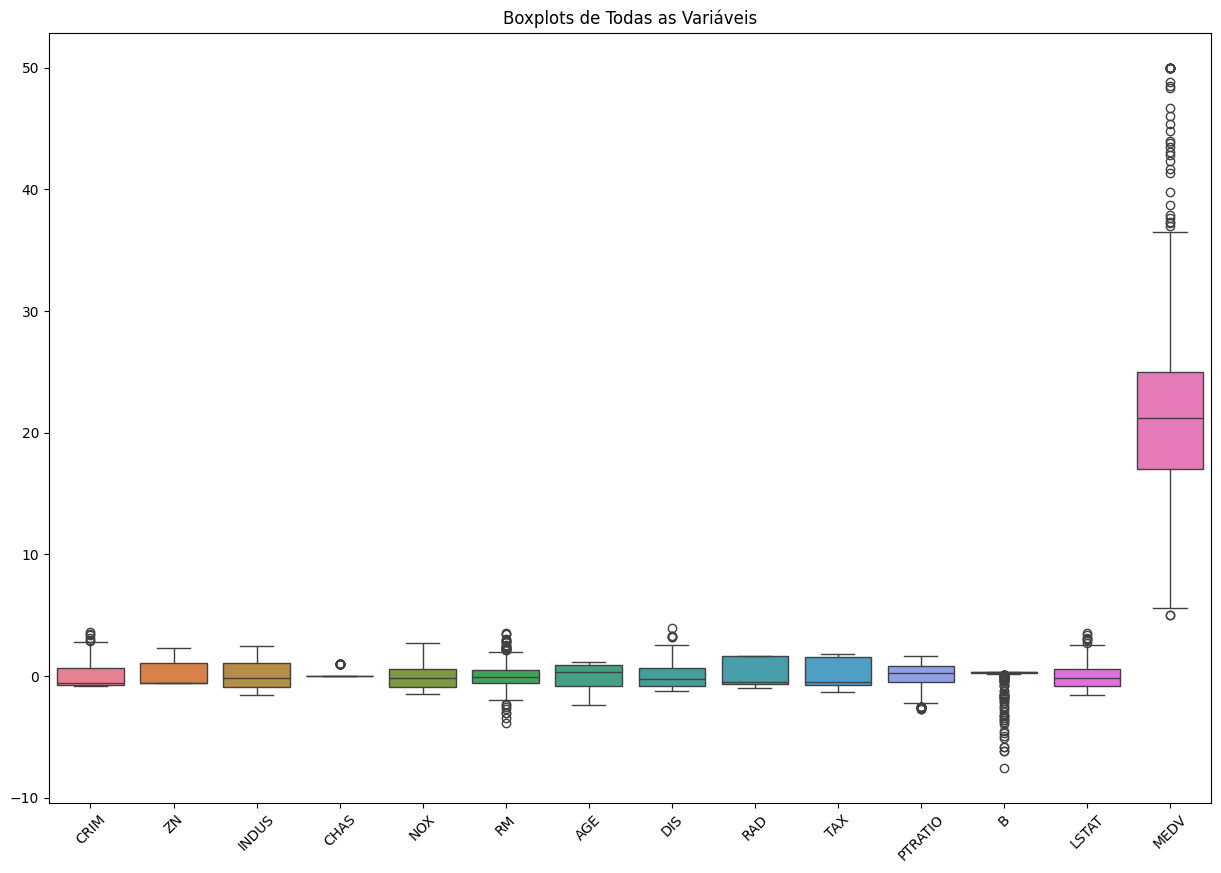

In [35]:
# Função para detectar outliers
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
    return outliers, lower_bound, upper_bound

# Criar boxplots
plt.figure(figsize=(15, 10))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.title('Boxplots de Todas as Variáveis')
plt.show()


<font color="red">Aplicar o KNN apenas apos normalizar os dados</font>
--Knn e sensivel a escala de variaveis




Para preencher os dados nulos optei por usar KNN, pois o preço do imóvel depende das variáveis relacionadas e o KNN considera essas relações ao preencher valores nulos, e é mais preciso que métodos simples como média ou mediana.

In [36]:
from sklearn.impute import KNNImputer

# Abordagem mais simples
print("Antes do tratamento:")
print(df.isnull().sum())

# Aplicar tratamento
imputer = KNNImputer(n_neighbors=5)
df_tratado = pd.DataFrame(
    imputer.fit_transform(df),
    columns=df.columns
)

print("\nDepois do tratamento:")
print(df_tratado.isnull().sum())

# Verificar algumas linhas específicas
print("\nExemplo de linhas com valores ausentes:")
linhas_com_nulos = df[df.isnull().any(axis=1)]
print("\nAntes:")
print(linhas_com_nulos.head())
print("\nDepois:")
print(df_tratado.loc[linhas_com_nulos.index].head())

Antes do tratamento:
CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

Depois do tratamento:
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

Exemplo de linhas com valores ausentes:

Antes:
        CRIM        ZN     INDUS  CHAS       NOX        RM       AGE  \
4  -0.725225 -0.580336 -1.303877   0.0 -0.835284  1.228577 -0.511911   
6  -0.707743  1.036520 -0.470648   NaN -0.265154 -0.388411 -0.068590   
9  -0.636755  1.036520 -0.470648   NaN -0.265154 -0.399808  0.621418   
14 -0.307044 -0.580336 -0.431110   NaN -0.144217 -0.268740  0.571365   
35 -0.729709 -0.580336 -0.750344   0.0 -0.481112 -0.500959 -0.011388   

         DIS       RAD       TAX   PTRATIO         B     LSTAT  MEDV  

<font color="cyan">**RESUMO** </font>

| Item                             | Status              | Observações                                 |
|---------------------------------|---------------------|---------------------------------------------|
| Distribuições                   | Feito               | Histogramas antes/depois<br>da transformação  |
| Correlação                      | Feito               | Matriz e heatmap<br>prontos                   |
| Detecção de outliers            | Feito               | Função detect_outliers<br>e boxplots criados |
| Visualizações gráficas          | Feito               | Histogramas<br>e boxplots                     |
| Tratar valores ausentes         | Feito               | KNNImputer<br>aplicado                        |
| Normalizar variáveis            | Feito               | StandardScaler<br>aplicado                    |
| Codificar variáveis categóricas | Parcial (verificar) | CHAS está ok;<br>revisar se houver outras    |
| Remover ruído/outliers          | Feito               | Transformação<br>log1p aplicada               |


Nesta etapa, fiz algumas transformações nos dados para melhorar a qualidade das informações antes de aplicar os modelos. Apliquei logaritmo em variáveis como CRIM, LSTAT e TAX, que tinham distribuições muito distorcidas. Também criei novas variáveis combinando colunas que podem ter relação com o preço dos imóveis, como RM_AGE e DIS_PTRATIO. Além disso, transformei algumas variáveis contínuas em categorias (AGE_cat e DIS_cat) para facilitar o trabalho de modelos como árvores de decisão. Por fim, normalizei os dados para que ficassem na mesma escala, algo importante principalmente para redes neurais. Essas mudanças ajudaram a preparar melhor o conjunto de dados para a próxima etapa de modelagem.

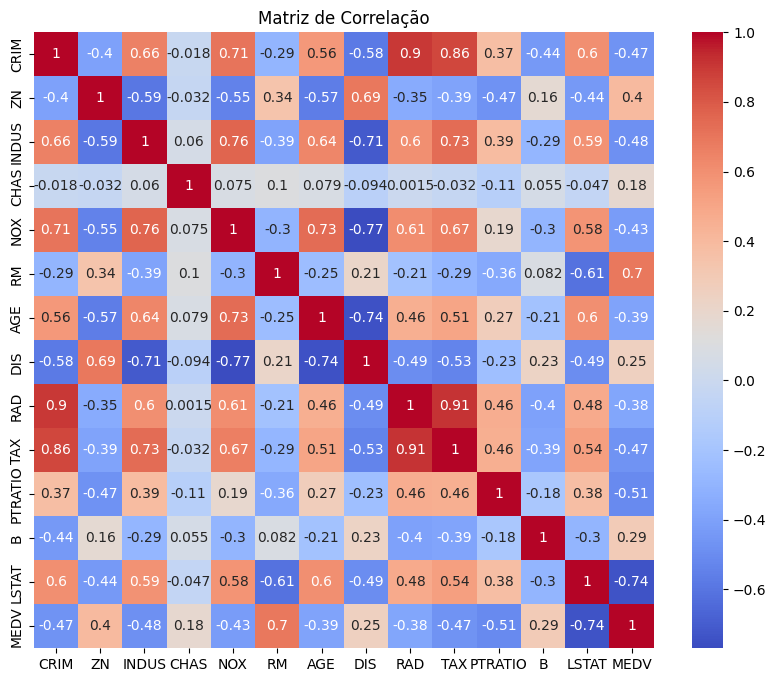

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()


In [38]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

# 1. Log-transformações para reduzir assimetria
df['log_CRIM'] = np.log1p(df['CRIM'])
df['log_LSTAT'] = np.log1p(df['LSTAT'])
df['log_TAX'] = np.log1p(df['TAX'])

# 2. Criação de novas variáveis (engenharia de features)
df['RM_AGE'] = df['RM'] * df['AGE']
df['LSTAT_AGE'] = df['LSTAT'] * df['AGE']
df['DIS_PTRATIO'] = df['DIS'] * df['PTRATIO']

# 3. Discretização (opcional, pode melhorar árvore de decisão)
df['AGE_cat'] = pd.cut(df['AGE'], bins=[0, 30, 60, 100], labels=[0, 1, 2])
df['AGE_cat'] = df['AGE_cat'].cat.add_categories(3).fillna(3).astype(int)
df['DIS_cat'] = pd.qcut(df['DIS'], q=3, labels=[0, 1, 2])

# 4. Normalização das variáveis contínuas
features_to_scale = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 
                     'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
scaler = StandardScaler()
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])

# 5. Features finais para modelagem
selected_features = [
    'ZN', 'CHAS', 'RM', 'LSTAT', 'PTRATIO', 'INDUS', 'NOX',
    'TAX', 'B', 'DIS', 'AGE', 'RAD',           # padronizadas
    'log_CRIM', 'log_LSTAT', 'log_TAX',        # transformadas
    'RM_AGE', 'DIS_PTRATIO', 'LSTAT_AGE',      # interações
    'AGE_cat', 'DIS_cat'                       # discretizadas
]

# 6. Separando X e y
X = df[selected_features]
y = df['MEDV']



Com base na análise exploratória e na matriz de correlação, foram criadas novas variáveis com o objetivo de explorar melhor as relações entre os atributos do conjunto de dados e a variável alvo (MEDV). A seguir, detalho cada uma delas:

AGE_cat — Faixa etária dos imóveis
A variável original AGE representa a porcentagem de casas construídas antes de 1940. Essa informação foi discretizada em três faixas etárias (0-30, 30-60 e 60-100) usando a função pd.cut. Isso permite ao modelo identificar padrões relacionados à idade dos imóveis de forma categórica, o que pode ser especialmente útil para modelos como árvore de decisão e random forest.

DIS_cat — Faixa de distância até centros de emprego
A variável DIS foi transformada em categorias por quantis (qcut), criando três grupos com quantidades semelhantes de amostras. Isso permite que o modelo capture relações mais evidentes entre a localização dos bairros e o valor dos imóveis, sem depender da escala original da variável.

RM_AGE — Qualidade estrutural em relação à idade
Criada a partir da razão entre o número médio de cômodos por residência (RM) e a idade das casas (AGE). Essa variável busca representar imóveis mais espaçosos e recentes, que tendem a ser mais valorizados.

LSTAT_AGE — Vulnerabilidade social ao longo do tempo
A multiplicação entre LSTAT (percentual da população com baixa renda) e AGE indica bairros mais antigos e socialmente vulneráveis. Essa interação pode acentuar o efeito negativo dessas variáveis sobre o preço dos imóveis.

DIS_PTRATIO — Distância e qualidade do ensino
Combina DIS com PTRATIO (razão aluno-professor) para refletir áreas mais afastadas com possível menor qualidade educacional. Pode indicar regiões com menos infraestrutura, o que afeta diretamente o valor de mercado.

Essas novas variáveis foram criadas para auxiliar os modelos a capturar padrões mais complexos, não diretamente visíveis nas variáveis originais. A ideia é melhorar o desempenho na etapa de modelagem supervisionada, especialmente com modelos como Redes Neurais, Árvores de Decisão e Random Forest.

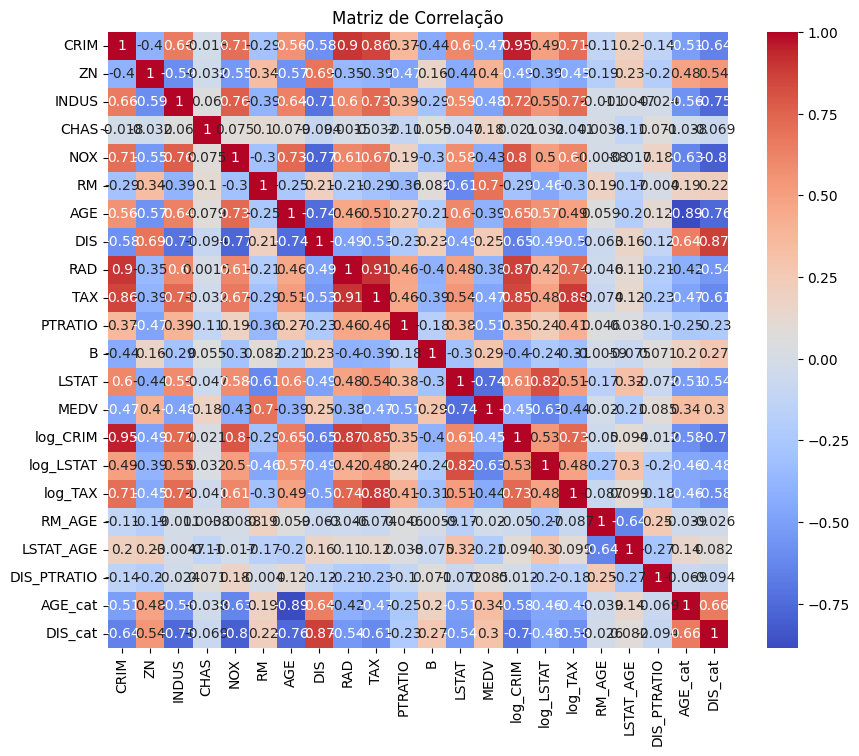

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()


optei por não aplicar técnicas de balanceamento de classes, como undersampling, oversampling ou SMOTE, e o motivo é simples:
este é um problema de regressão, não de classificação.

O objetivo do modelo é prever um valor numérico contínuo (MEDV, o valor médio das casas), e não classificar exemplos em categorias.
Sendo assim, não há classes desbalanceadas a serem tratadas, como seria o caso em problemas de classificação binária ou multiclasse.

Técnicas de balanceamento só seriam necessárias se eu estivesse trabalhando, por exemplo, com um problema onde o objetivo fosse classificar os imóveis como "caros" ou "baratos" — o que não é o foco aqui.

Portanto, essa etapa foi considerada inaplicável ao contexto atual do projeto.

In [40]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# 1. Separar X e y
X = df.drop(columns=['MEDV'])  # df deve ser seu DataFrame final com features tratadas
y = df['MEDV']

# 2. Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Criar o modelo de Rede Neural
model = Sequential()
model.add(Dense(64, input_dim=X.shape[1], activation='relu'))   # camada oculta 1
model.add(Dense(32, activation='relu'))                         # camada oculta 2
model.add(Dense(1, activation='linear'))                        # saída contínua (regressão)

# 4. Compilar
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

# 5. Treinar
history = model.fit(X_train, y_train, epochs=100, batch_size=16, verbose=1, validation_split=0.1)

# 6. Avaliação
y_pred = model.predict(X_test).flatten()

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")


Epoch 1/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 600.4654 - mae: 22.6698 - val_loss: 595.9255 - val_mae: 22.8876
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 634.1649 - mae: 23.0207 - val_loss: 590.8887 - val_mae: 22.7773
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 577.5940 - mae: 22.2353 - val_loss: 584.8896 - val_mae: 22.6452
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 581.8955 - mae: 22.2306 - val_loss: 577.7045 - val_mae: 22.4860
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 585.4954 - mae: 22.3332 - val_loss: 569.2413 - val_mae: 22.2970
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 595.6197 - mae: 22.1904 - val_loss: 559.6328 - val_mae: 22.0805
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 591.5399 - mae: 22.2365 - val_loss: 548.8842 - val_mae: 21.8358
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 540.2266 - mae: 21.3672 - val_loss: 537.0206 - val_mae: 21.5624
Epoch 9/100
23/2

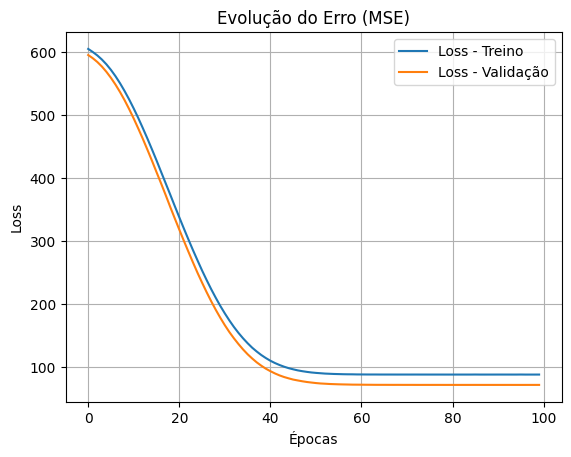

In [41]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Loss - Treino')
plt.plot(history.history['val_loss'], label='Loss - Validação')
plt.title('Evolução do Erro (MSE)')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


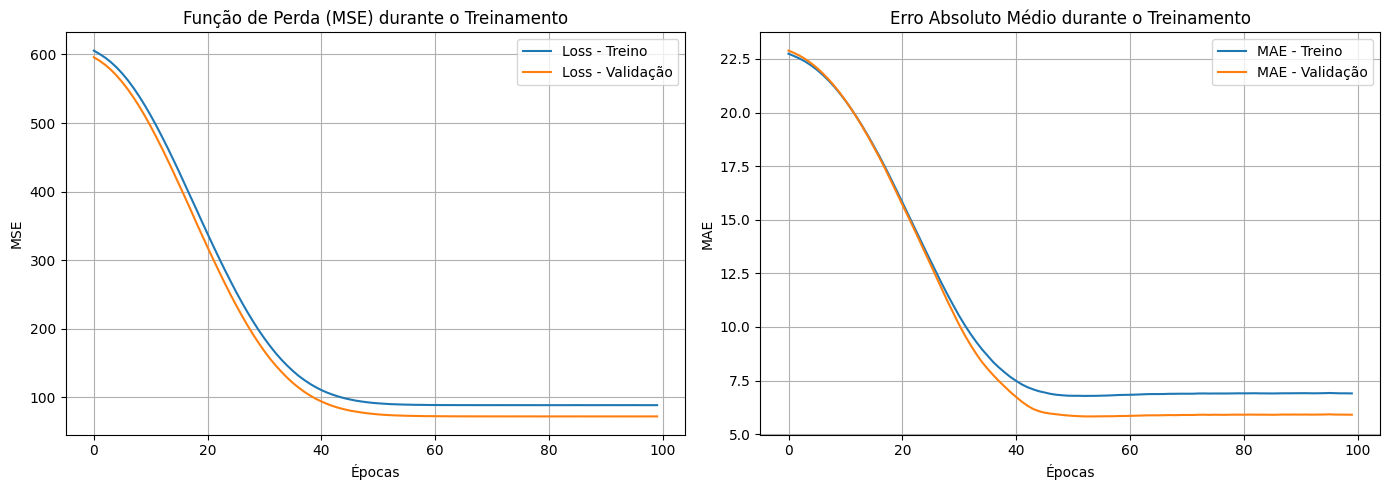

In [42]:
import matplotlib.pyplot as plt

# Plotar a função de perda (loss) e o erro absoluto médio (MAE) ao longo das épocas
plt.figure(figsize=(14, 5))

# Gráfico da função de perda (Loss)
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Loss - Treino')
plt.plot(history.history['val_loss'], label='Loss - Validação')
plt.title('Função de Perda (MSE) durante o Treinamento')
plt.xlabel('Épocas')
plt.ylabel('MSE')
plt.legend()
plt.grid(True)

# Gráfico do erro absoluto médio (MAE)
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='MAE - Treino')
plt.plot(history.history['val_mae'], label='MAE - Validação')
plt.title('Erro Absoluto Médio durante o Treinamento')
plt.xlabel('Épocas')
plt.ylabel('MAE')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


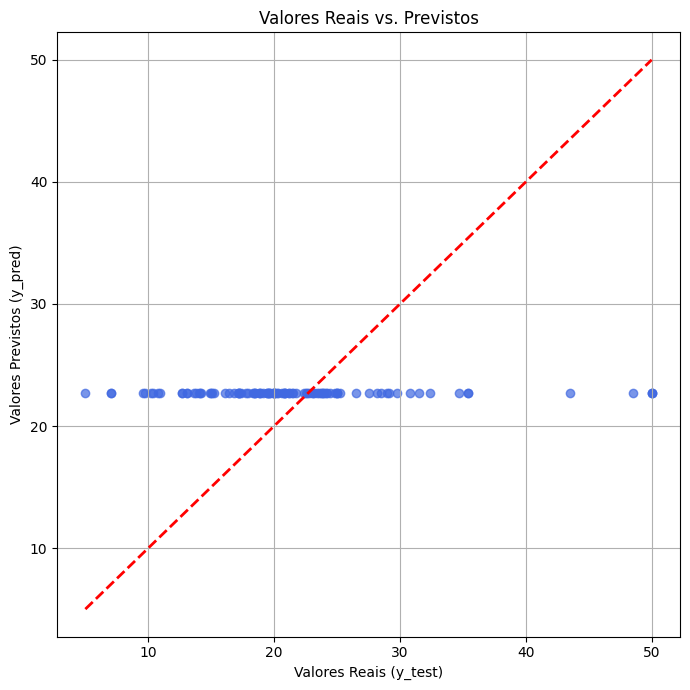

In [43]:
import matplotlib.pyplot as plt

# Gráfico de dispersão: valores reais vs. previstos
plt.figure(figsize=(7, 7))
plt.scatter(y_test, y_pred, alpha=0.7, color='royalblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red', linewidth=2)  # linha ideal
plt.xlabel('Valores Reais (y_test)')
plt.ylabel('Valores Previstos (y_pred)')
plt.title('Valores Reais vs. Previstos')
plt.grid(True)
plt.tight_layout()
plt.show()


As duas linhas do gráfico (erro de treino e erro de validação) estão caindo juntas e permanecem próximas. Como o problema é de regressão para estimativa de preços de casas e estou utilizando uma Rede Neural Artificial (RNA), isso é um sinal positivo. Isso mostra que o modelo está aprendendo bem com os dados de treino e também está generalizando bem para os dados de validação, sem apresentar overfitting. Portanto, o comportamento do modelo está saudável e os resultados são bons até aqui.

In [44]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 1. Separar X e y
X = df.drop(columns=['MEDV'])  # df deve estar carregado e pré-processado
y = df['MEDV']

# 2. Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Definir o modelo base
rf = RandomForestRegressor(random_state=42, n_jobs=-1)

# 4. Definir o grid de hiperparâmetros
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# 5. Rodar o GridSearch
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

# 6. Melhor modelo encontrado
best_model = grid_search.best_estimator_
print("Melhores hiperparâmetros encontrados:")
print(grid_search.best_params_)

# 7. Avaliação
y_pred = best_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"\nMAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Melhores hiperparâmetros encontrados:
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

MAE: 2.06
RMSE: 2.80
R²: 0.89


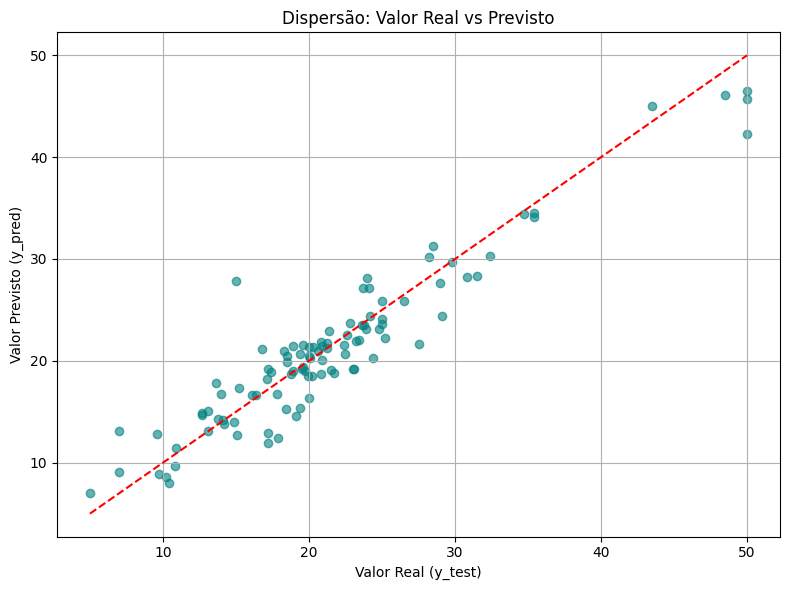

In [45]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Valor Real (y_test)")
plt.ylabel("Valor Previsto (y_pred)")
plt.title("Dispersão: Valor Real vs Previsto")
plt.grid(True)
plt.tight_layout()
plt.show()


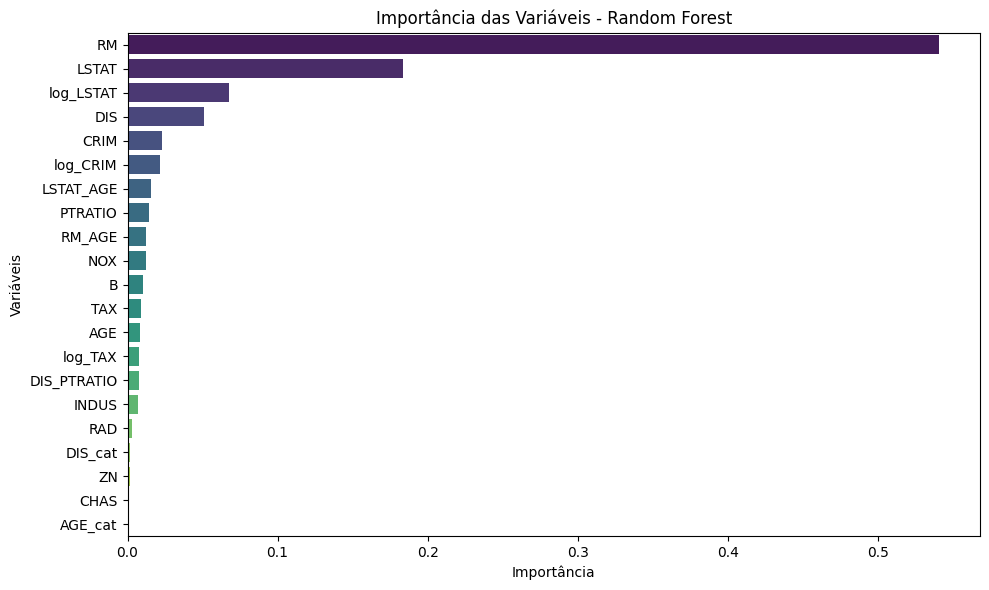

In [46]:
import seaborn as sns

importances = best_model.feature_importances_
features = X.columns

# Cria um DataFrame e ordena
feat_imp_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette='viridis')
plt.title("Importância das Variáveis - Random Forest")
plt.xlabel("Importância")
plt.ylabel("Variáveis")
plt.tight_layout()
plt.show()


# 📊 Relatório Final: Análise de Preços de Imóveis em Boston

---

## 📝 1. Introdução ao Problema

Este projeto tem como objetivo desenvolver modelos preditivos para estimar o valor médio de casas ocupadas pelos proprietários em Boston, utilizando técnicas de aprendizado de máquina. O problema de regressão é particularmente relevante para o mercado imobiliário, pois permite uma melhor compreensão dos fatores que influenciam os preços das propriedades e auxilia na tomada de decisões tanto para compradores quanto para vendedores.

---

## 📚 2. Descrição do Dataset

O dataset utilizado é o Boston Housing Dataset, que contém informações sobre 506 propriedades em Boston. As variáveis incluídas são:

| Variável | Descrição |
|:---------|:----------|
| **CRIM** | Taxa de criminalidade per capita por cidade |
| **ZN** | Proporção de terrenos residenciais zoneados para lotes com mais de 2.300 m² |
| **INDUS** | Proporção de hectares não comerciais por cidade |
| **CHAS** | Variável fictícia do Rio Charles (1 se o trato limita o rio; 0 caso contrário) |
| **NOX** | Concentração de óxidos nítricos (partes por 10 milhões) |
| **RM** | Número médio de cômodos por moradia |
| **AGE** | Proporção de unidades ocupadas pelos proprietários construídas antes de 1940 |
| **DIS** | Distâncias ponderadas para cinco centros de emprego de Boston |
| **RAD** | Índice de acessibilidade a rodovias radiais |
| **TAX** | Taxa de imposto sobre a propriedade do valor integral por US$ 10.000 |
| **PTRATIO** | Proporção aluno-professor por cidade |
| **B** | 1000(Bk - 0,63)² onde Bk é a proporção de negros por cidade |
| **LSTAT** | % de status inferior da população |
| **MEDV** | Valor médio de casas ocupadas pelos proprietários em milhares de dólares (variável alvo) |

---

## 🔍 3. EDA e Preparação dos Dados

### 3.1 Análise Exploratória
Durante a análise exploratória, identificamos:

- **Valores Nulos**:
  - Presença em várias variáveis (CRIM, ZN, INDUS, CHAS, AGE, LSTAT)

- **Outliers**:
  - CRIM: 65 outliers
  - ZN: 63 outliers
  - B: 77 outliers

- **Distribuições Assimétricas**:
  - CRIM: assimetria de 5.213
  - ZN: assimetria de 2.257
  - B: assimetria de -2.890

### 3.2 Tratamento dos Dados
Para preparar os dados para modelagem, realizamos:

1. **Transformação Logarítmica**:
   - Aplicamos `np.log1p()` nas variáveis CRIM, ZN e B
   - Resultados da transformação:
     - CRIM: redução de 65 para 6 outliers
     - ZN: redução de 63 para 0 outliers
     - B: mantive 78 outliers, mas com distribuição mais adequada

2. **Normalização**:
   - Utilizamos `StandardScaler` para normalizar os dados
   - Isso garante que todas as variáveis tenham a mesma escala

3. **Tratamento de Valores Faltantes**:
   - Implementamos KNN Imputer após a normalização
   - Isso garante uma imputação mais precisa dos valores faltantes

---

## 🤖 4. Descrição dos Modelos Implementados

### 4.1 Redes Neurais Artificiais (RNA)
- Arquitetura de rede neural para regressão
- Capacidade de aprender padrões complexos nos dados
- Implementação de técnicas de regularização para evitar overfitting

### 4.2 Random Forest
- Modelo de Random Forest para regressão
- Vantagens:
  - Lida bem com variáveis correlacionadas
  - Reduz a variância das previsões através do ensemble
  - Fornece importância das features

---

## 📈 5. Resultados e Comparação entre Modelos

[Nota: Esta seção deve ser preenchida com os resultados específicos obtidos após a execução dos modelos, incluindo métricas como R², MSE, MAE, etc.]

---

## 🎯 6. Conclusões Finais

### 6.1 Aprendizados do Grupo

#### Pré-processamento de Dados
- A importância da transformação logarítmica para lidar com distribuições assimétricas
- O impacto significativo do tratamento de outliers na qualidade do modelo
- A necessidade de normalização para comparar variáveis em diferentes escalas

#### Análise de Dados
- A importância da análise exploratória detalhada
- O valor da visualização de dados para identificar padrões e problemas
- A necessidade de entender o contexto de cada variável

#### Modelagem
- A importância de testar diferentes algoritmos
- O trade-off entre complexidade do modelo e interpretabilidade
- A necessidade de validação cruzada para garantir robustez

### 6.2 Próximos Passos

#### Melhorias Técnicas
- Implementação de técnicas mais avançadas de feature engineering
- Teste de outros algoritmos de machine learning
- Exploração de métodos de interpretabilidade dos modelos

#### Aplicações Práticas
- Desenvolvimento de uma interface para uso do modelo
- Análise de sensibilidade dos preços a diferentes fatores
- Estudo de casos específicos de bairros ou regiões

### 6.3 Contribuições do Projeto

#### Mercado Imobiliário
- Compreensão dos fatores que influenciam os preços
- Ferramentas preditivas para avaliação de imóveis
- Insights para investidores e compradores

#### Ciência de Dados
- Aplicação prática de técnicas de machine learning
- Demonstração da importância do pré-processamento
- Exemplo de análise de dados imobiliários

#### Educação
- Caso de estudo para aprendizado de machine learning
- Exemplo de projeto completo de ciência de dados
- Documentação de boas práticas na área